### Canonical Correlation Analysis
- The goal of Canonical Correlation Analysis (CCA) is to find the linear combinations of two sets of variables, $X$ and $Y$, that **_maximize the correlation between the two new variables_**.
  
- Specifically, we aim to maximize the canonical correlation $\rho_1$ between $u_1 = X a_1$ and $v_1 = Y b_1$, where $a_1$ and $b_1$ are the weight vectors for the linear combinations of $X$ and $Y$, respectively.

---

### Given
- $X \in \mathbb{R}^{n \times p}$ — $n$ observations of $p$ variables.
- $Y \in \mathbb{R}^{n \times q}$ — $n$ observations of $q$ variables.
- $a_1 \in \mathbb{R}^p$ — Weight vector for the first canonical variable of $X$.
- $b_1 \in \mathbb{R}^q$ — Weight vector for the first canonical variable of $Y$.
- $u_1 = X a_1 \in \mathbb{R}^n$ — First canonical variable for $X$.
- $v_1 = Y b_1 \in \mathbb{R}^n$ — First canonical variable for $Y$.

---

### Objective is to Maximize Canonical Correlation Coefficient
The objective is to maximize the correlation between $u_1$ and $v_1$:

$$
\max_{a_1, b_1} \quad \text{corr}(u_1, v_1) = \frac{a_1' \Sigma_{XY} b_1}{\sqrt{a_1' \Sigma_X a_1} \sqrt{b_1' \Sigma_Y b_1}}
$$

Where:
- $\Sigma_X = \text{Cov}(X)$
- $\Sigma_Y = \text{Cov}(Y)$
- $\Sigma_{XY} = \text{Cov}(X, Y)$

The first canonical correlation $\rho_1$ is the eigenvalue corresponding to the first pair of eigenvectors $a_1$ and $b_1$.

---

### Application Examples

1. **Redundancy Analysis**: CCA can be used to analyze redundancy in data.
 
2. **Psychometrics**: CCA helps in assessing the relationship between two sets of psychological measures.

3. **Econometrics**: CCA is applied to study the relationships between macroeconomic indicators (e.g., GDP, inflation) and financial variables (e.g., stock market indices).


---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')

# Load diabetes dataset
features, _ = load_diabetes(
    return_X_y=True, as_frame=True, scaled=True
)

# Define feature sets for CCA
features_set_1 = ['age', 's1']
features_set_2 = ['bmi', 's2']
features_1 = features[features_set_1]
features_2 = features[features_set_2]

# Perform Canonical Correlation Analysis (CCA)
cca = CCA(scale=False, n_components=1)
cca.fit(features_1, features_2)

CCA(n_components=1, scale=False)

R: 0.8968912263081907


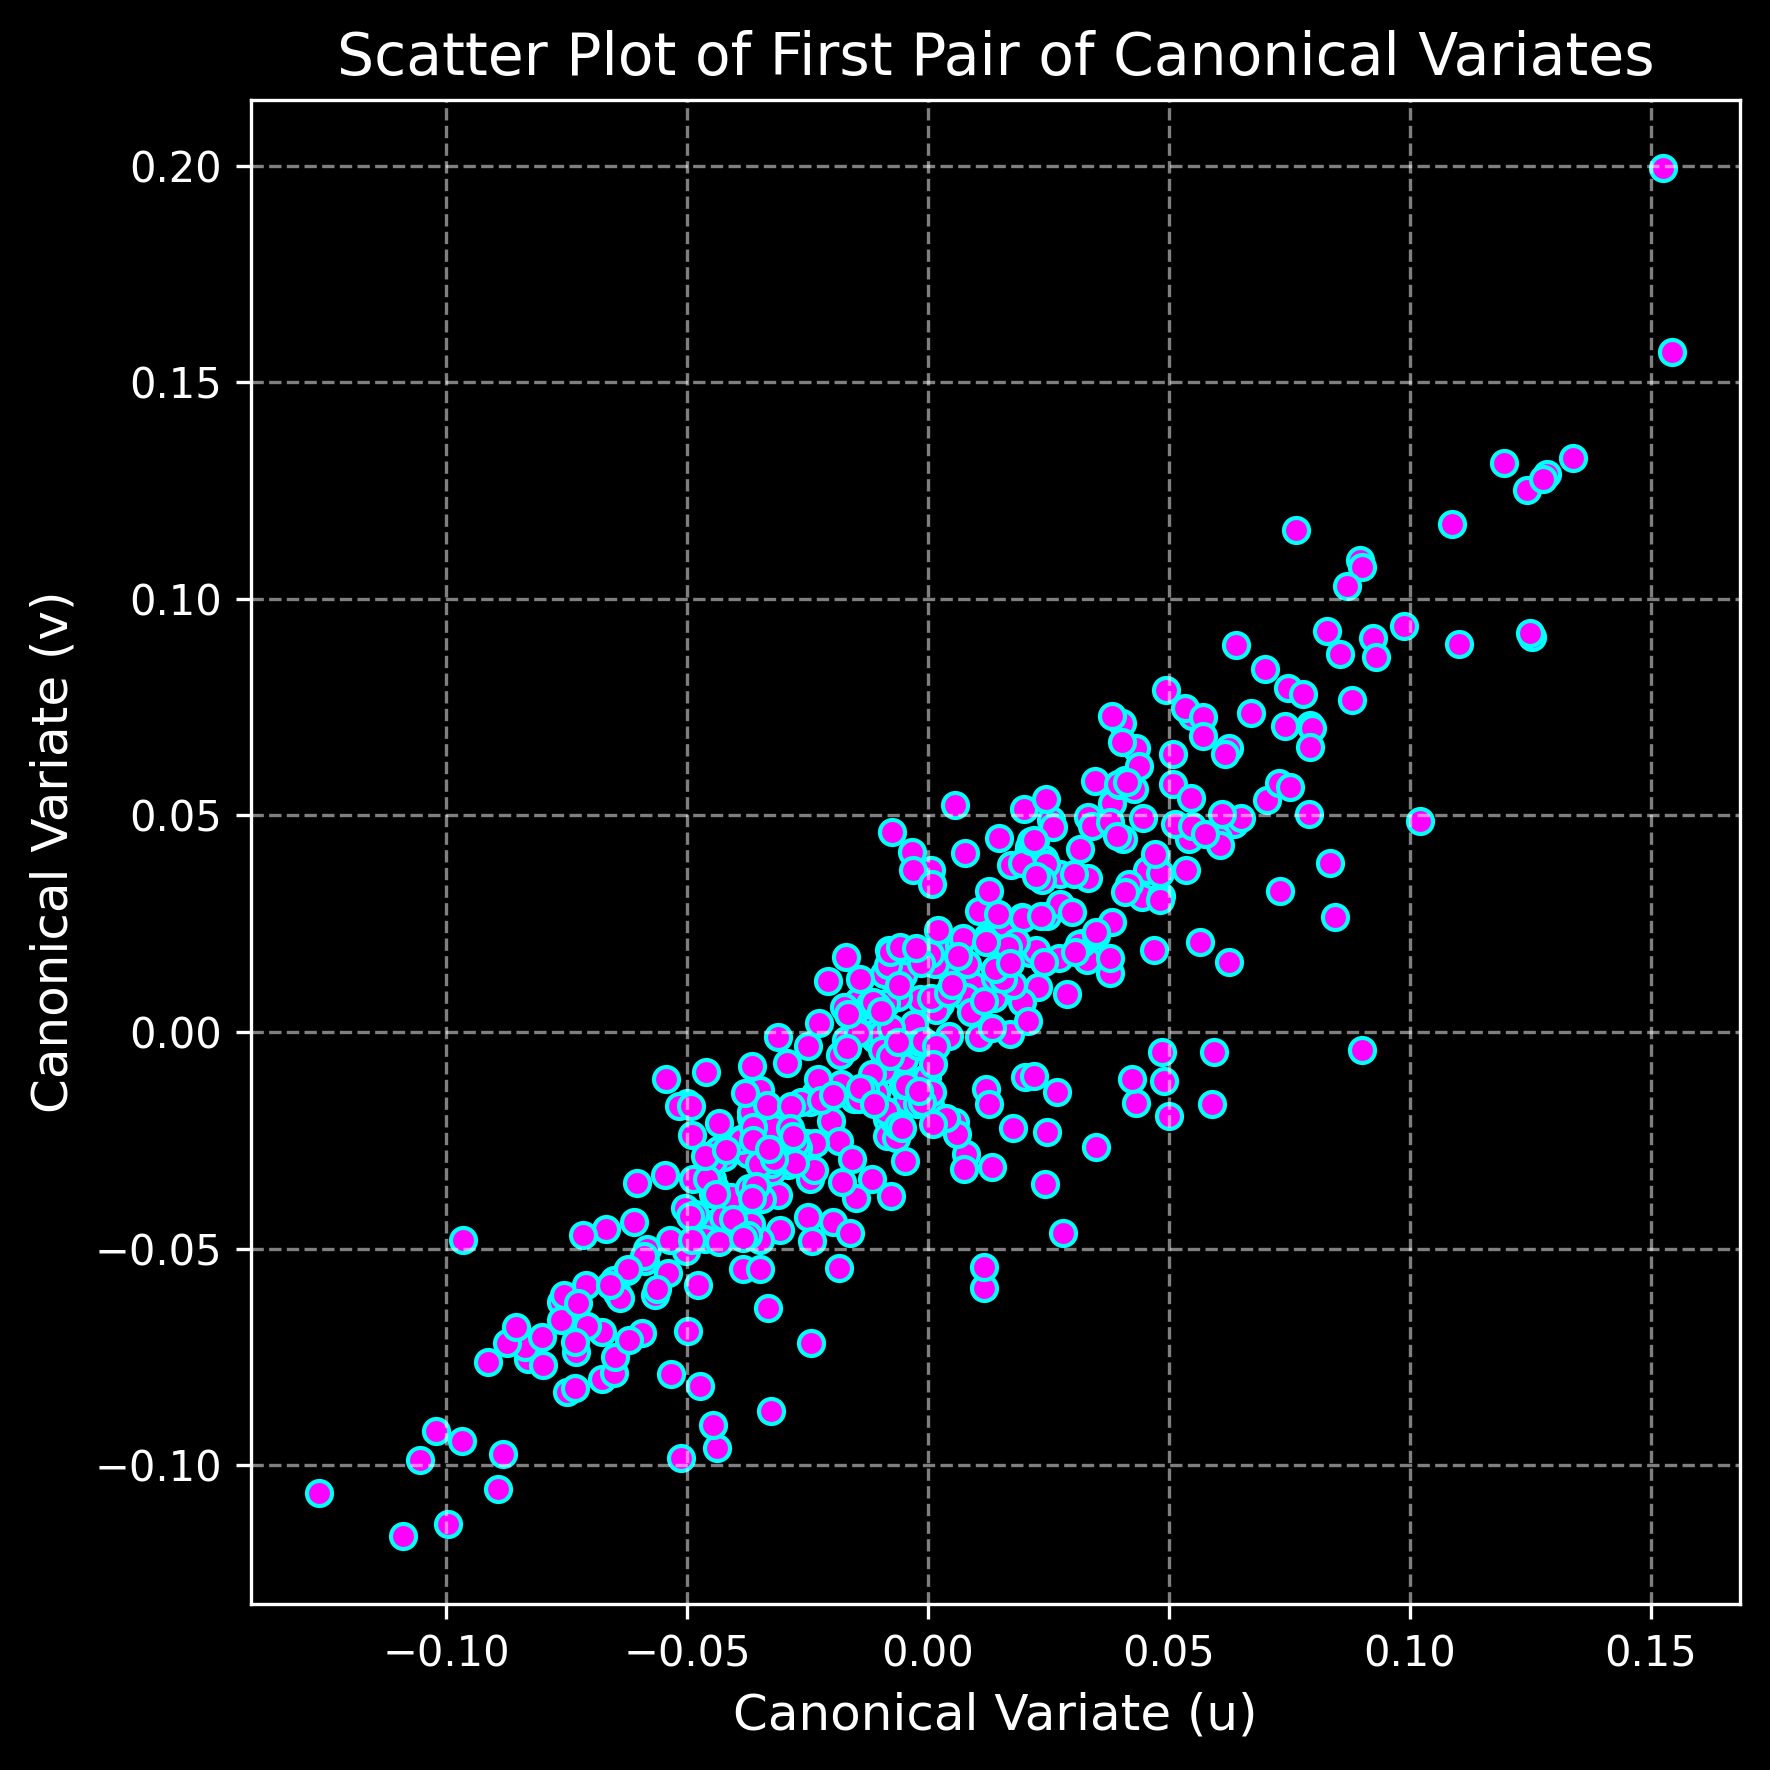

In [2]:
# Transform features to obtain first canonical variates
u, v = cca.transform(features_1, features_2)
u, v = u.squeeze(), v.squeeze()

# Compute canonical correlation
canonical_corr_coef = np.corrcoef(u, v)[0, 1]
print(f"R: {canonical_corr_coef}")

# Scatter plot of the first canonical variates
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(u, v, alpha=1.0, c='magenta', 
            edgecolor='cyan')
plt.title(
    'Scatter Plot of First Pair of Canonical Variates', 
    fontsize=14
)
plt.xlabel('Canonical Variate (u)', fontsize=12)
plt.ylabel('Canonical Variate (v)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('cca.png', dpi=300)
plt.show()

In [ ]:
# Weights correspond to the weights applied to the original variables during the CCA transformation.
# They are typically used in defining the linear combinations that result in the canonical variates.
print("X Weights (for features_set_1):")
print(cca.x_weights_)

print("Y Weights (for features_set_2):")
print(cca.y_weights_)